In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('labeled_dataset.csv')
df_original = df.copy()

df.head(5)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message,isMalicious
0,Application,2023-09-22,00:10:15,CLIENT-PC,Microsoft-Windows-Security-SPP,NaN,4,Classic,NaN,16384,4,3267,Successfully scheduled Software Protection ser...,No
1,System,2023-09-22,00:10:01,CLIENT-PC,Microsoft-Windows-Kernel-General,NaN,4,NaN,Info,16,4,2279,The access history in hive \??\C:\Users\Commun...,No
2,Application,2023-09-22,00:09:45,CLIENT-PC,SecurityCenter,NaN,4,Classic,Info,15,4,3266,Updated Windows Defender status successfully t...,No
3,System,2023-09-22,00:09:23,CLIENT-PC,Microsoft-Windows-Kernel-General,NaN,4,NaN,Info,16,4,2278,The access history in hive \??\C:\Users\Commun...,No
4,Application,2023-09-22,00:09:20,CLIENT-PC,Microsoft-Windows-Security-SPP,NaN,2,Classic,NaN,8198,2,3265,License Activation (slui.exe) failed with the ...,No


### Creating the Model

Let's create our machine learning model using logistic regression algorithm:

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['isMalicious'], test_size=0.2, random_state=42)

# Count Vectorization
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize and train a machine learning model (Logistic Regression) to predict IsMalicious
model = LogisticRegression(random_state=42)
model.fit(X_train_count, y_train)

LogisticRegression(random_state=42)

### Model Evaluation:

Let's evaluate our model:

In [4]:
# Multiple Scoring methods
y_pred = model.predict(X_test_count)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        63
         Yes       1.00      1.00      1.00      4102

    accuracy                           1.00      4165
   macro avg       1.00      1.00      1.00      4165
weighted avg       1.00      1.00      1.00      4165



<Axes: >

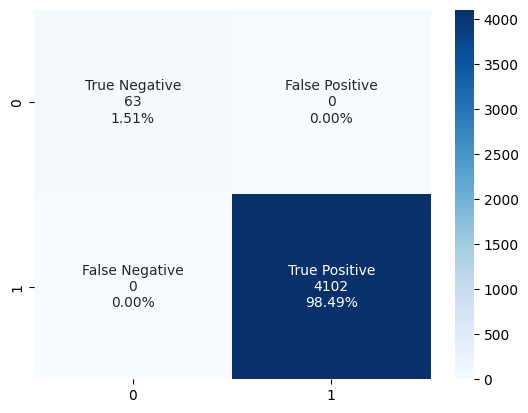

In [5]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

Let's save our model:

In [6]:
with open('file-encryption-logistic_regression_model.pkl', 'wb') as fout:
    pickle.dump((count_vectorizer, model), fout)

### Reloading the model (after it been saved)
It's important for us to save the model because we want it to work as close to real-time as possible.

So let's reload the model and rerun it on our dataset to ensure everything works as expected:

In [7]:
with open('file-encryption-logistic_regression_model.pkl', 'rb') as f:
    vectorizer, model = pickle.load(f)

log_messages_vectorized = vectorizer.transform(df['Message'])
predicted_probabilities = model.predict_proba(log_messages_vectorized)
isMalicious = ['Yes' if x[1] > 0.7 else 'No' for x in predicted_probabilities]
df = df.drop(['isMalicious'], axis=1)
df['IsMalicious'] = isMalicious

In [8]:
df.head(5)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message,IsMalicious
0,Application,2023-09-22,00:10:15,CLIENT-PC,Microsoft-Windows-Security-SPP,NaN,4,Classic,NaN,16384,4,3267,Successfully scheduled Software Protection ser...,No
1,System,2023-09-22,00:10:01,CLIENT-PC,Microsoft-Windows-Kernel-General,NaN,4,NaN,Info,16,4,2279,The access history in hive \??\C:\Users\Commun...,No
2,Application,2023-09-22,00:09:45,CLIENT-PC,SecurityCenter,NaN,4,Classic,Info,15,4,3266,Updated Windows Defender status successfully t...,No
3,System,2023-09-22,00:09:23,CLIENT-PC,Microsoft-Windows-Kernel-General,NaN,4,NaN,Info,16,4,2278,The access history in hive \??\C:\Users\Commun...,No
4,Application,2023-09-22,00:09:20,CLIENT-PC,Microsoft-Windows-Security-SPP,NaN,2,Classic,NaN,8198,2,3265,License Activation (slui.exe) failed with the ...,No


In [9]:
df.tail(5)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message,IsMalicious
20818,Security,2023-08-26,18:09:02,CLIENT-PC,Microsoft Windows security auditing.,File System,0,Audit Success,Info,4658,0,280921,The handle to an object was closed.,Yes
20819,Security,2023-08-26,18:09:02,CLIENT-PC,Microsoft Windows security auditing.,Handle Manipulation,0,Audit Success,Info,4690,0,280922,An attempt was made to duplicate a handle to a...,Yes
20820,Security,2023-08-26,18:09:02,CLIENT-PC,Microsoft Windows security auditing.,File System,0,Audit Success,Info,4658,0,280923,The handle to an object was closed.,Yes
20821,Security,2023-08-26,18:09:02,CLIENT-PC,Microsoft Windows security auditing.,File System,0,Audit Success,Info,4656,0,280924,A handle to an object was requested.,Yes
20822,Security,2023-08-26,18:09:02,CLIENT-PC,Microsoft Windows security auditing.,Handle Manipulation,0,Audit Success,Info,4690,0,280925,An attempt was made to duplicate a handle to a...,Yes
